In [349]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [350]:
##First Import the dataset in csv format and convert it into a dataframe named df.

df=pd.read_csv("s3://aws-ml-ai-week4/owid-covid-data.csv")
dummy_df=df
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### Data Exploration

In [351]:
print("Size of the dataset ",df.shape)

('Size of the dataset ', (50301, 41))


In [352]:
data_type=pd.DataFrame(dummy_df.dtypes).T
print("Checking Data-Type of each columns:")
data_type

Checking Data-Type of each columns:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,object,object,object,object,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [353]:
null_values=pd.DataFrame(df.isnull().sum()).T
null_values['total_missing']=null_values.sum(axis=1)
print("Checking for null values:")
null_values



Checking for null values:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_missing
0,290,580,0,0,636,862,1644,636,862,1644,...,20805,5496,3887,15275,15722,29246,9873,926,7059,435017


### Extracting only the significant feature columns

Here we can observe that there are around 41 columns; all of them having some kind of missing data. 
Due to the lack of knowledge on domain expertise analysing all of the features subspace is not possible.
So it is the right decision to adopt that only significant features should be selected. 
Here, I have used the RandomForestRegressor to extract the 10 most significant features.


In [354]:
## Firstly I have to swap the columns.
## As my dependent variable is the total_cases I need to swap it to the last column. 
def column_swap(df,col1,col2):
    colnames=df.columns.tolist()
    i1,i2=colnames.index(col1),colnames.index(col2)
    colnames[i2],colnames[i1]=colnames[i1],colnames[i2]
    return df[colnames]
df=column_swap(df,'total_cases','human_development_index') 


In [355]:
##Let me quickly remove all the NAN values for now, 
##I will use the dummy_df to remove the null values and check for the Best features 
dummy_df=column_swap(dummy_df,'total_cases','human_development_index') 
dummy_df=dummy_df.dropna()

X_dummy=dummy_df.loc[:,dummy_df.dtypes=="float64"]
X=X_dummy.iloc[:,0:35]
y=dummy_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
feat_labels=X.columns[0:35]
model=RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print('The list of features based on the significance score:\n ')
for f in range(X.shape[1]):
    print("%2d) %-*s %f"%(f+1,22,feat_labels[indices[f]],importances[indices[f]]))


The list of features based on the significance score:
 
 1) new_cases_smoothed     0.510355
 2) total_tests            0.279583
 3) new_deaths_smoothed    0.085789
 4) total_deaths           0.070906
 5) total_cases_per_million 0.022294
 6) total_tests_per_thousand 0.013103
 7) total_deaths_per_million 0.007234
 8) new_cases              0.003789
 9) new_cases_smoothed_per_million 0.001814
10) new_deaths_smoothed_per_million 0.001277
11) new_tests_per_thousand 0.000591
12) new_deaths             0.000484
13) stringency_index       0.000478
14) median_age             0.000409
15) tests_per_case         0.000351
16) new_tests_smoothed_per_thousand 0.000338
17) new_deaths_per_million 0.000262
18) new_tests_smoothed     0.000227
19) new_cases_per_million  0.000186
20) new_tests              0.000137
21) male_smokers           0.000089
22) positive_rate          0.000085
23) human_development_index 0.000084
24) aged_65_older          0.000064
25) cardiovasc_death_rate  0.000055
26) populati

### Plotting out the top 10 features

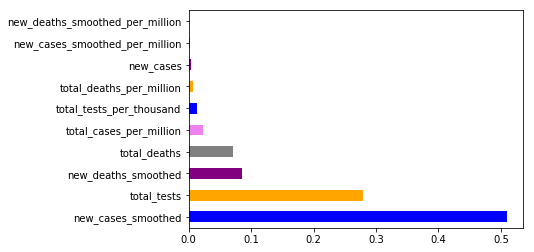

In [356]:
feat_importances=pd.Series(importances,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color=['blue','orange','purple','grey','violet'])
plt.show()

Here we can observe the significance score of the top 10 features.
From this analysis we can conclude that this features are very critical to the use case
and we should not drop the following columns to maintin the integrity of the data. On further analysis we can observe that new_tests, total_cases_per_million,total_tests_per_thousand,total_deaths_per_million are increasing in a same rate and holds a lesser significance to the use case. Hence this features also can be neglected.

### Data Pre-Processing

In [357]:
## Selecting only the significant columns.
selected_columns=['iso_code','continent','location','date','new_cases',
                  'total_deaths','new_deaths_smoothed','new_tests_smoothed',
                  'new_cases_smoothed','total_tests','total_cases']
new_df=df[selected_columns]
new_df["date"]=new_df.loc[:,"date"].apply(pd.to_datetime)


In [358]:
## Here a new dataframe is created containig only the significant columns.
new_df.head()


,iso_code,continent,location,date,new_cases,total_deaths,new_deaths_smoothed,new_tests_smoothed,new_cases_smoothed,total_tests,total_cases
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,NaN,NaN,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,0.0


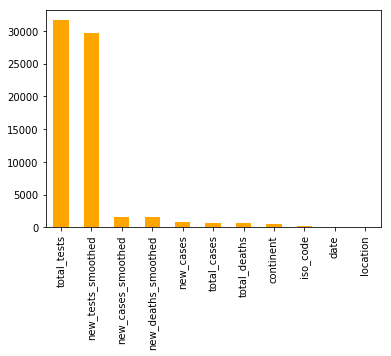

In [359]:
## Visualizing the null values count
new_df.isnull().sum().sort_values(ascending=False).plot(kind='bar',color=['orange'])

The bar diagram shows the total missing values across the features.
The total_tests and new_tests_smoothed has a lot of missing values.

### Finding the correlation among the features

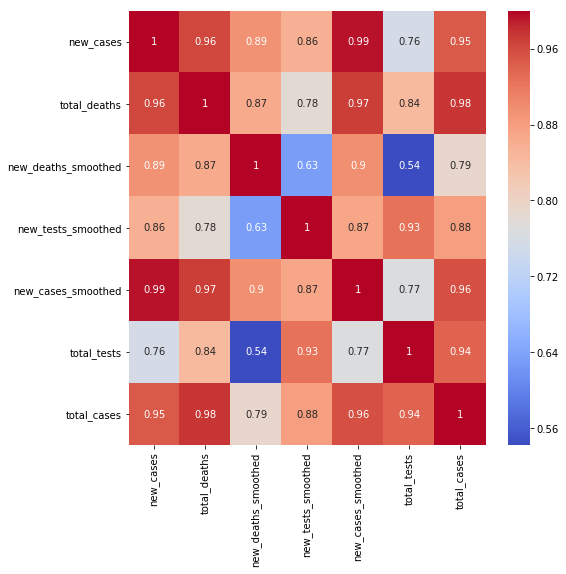

In [360]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(),annot=True,cmap="coolwarm")

Here we can observe that total_tests and new_deaths_smoothed are negatively correlated which means that as the total_tests increases the new_deaths_smoothed decreases and vice-versa


### Imputation of missing values

In cases of time series use cases, it is very much criticial to avoid removing of the null values. We cannot simply remove the missing values as time series data follows a some kind of trend or pattern so it is very much necessary to capture the missing values and perform imputation accordingly to capture the movement of the trend. 

Now in case of time series.We simply cannot impute it with mean/median or even random imputation techniques as the data are placed in some trend so we simply cannot impute it with mean as it does not make sense to place a mean value in a upward/downward trend. 

In order to perform imputation we can use fordward fill method where each missing values is imputated with respect to it's previous data state.

In [361]:
## In Time Series data it is very much handy to make the date column the index of the dataframe.
## Setting up date column as the index of the dataframe.

new_df=new_df.set_index('date')
new_df.head()


,iso_code,continent,location,new_cases,total_deaths,new_deaths_smoothed,new_tests_smoothed,new_cases_smoothed,total_tests,total_cases
date,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2020-01-03,AFG,Asia,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2020-01-04,AFG,Asia,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0


In [362]:
## Performing fordward fill imputation
def impute_nan(df,feature):
    df[feature+'_imp']=df[feature].fillna(method='ffill')
    return df

new_df=impute_nan(new_df,'new_cases')
new_df=impute_nan(new_df,'total_deaths')
new_df=impute_nan(new_df,'new_deaths_smoothed')
new_df=impute_nan(new_df,'new_tests_smoothed')
new_df=impute_nan(new_df,'new_cases_smoothed')
new_df=impute_nan(new_df,'total_tests')
new_df=impute_nan(new_df,'total_cases')

In [363]:
new_df.isnull().sum()

iso_code                     290
continent                    580
location                       0
new_cases                    862
total_deaths                 636
new_deaths_smoothed         1644
new_tests_smoothed         29649
new_cases_smoothed          1644
total_tests                31629
total_cases                  636
new_cases_imp                  0
total_deaths_imp               0
new_deaths_smoothed_imp        6
new_tests_smoothed_imp      1651
new_cases_smoothed_imp         6
total_tests_imp             1644
total_cases_imp                0
dtype: int64

Here we can see that the ratio of the missing values are exponentially reduced and thus the values which are stilling missing can be dropped as their previous data state is itself in missing state hence it can be safely removed.

Here we can remove the previous feature columns as well.

In [364]:
def drop_columns(df,column):
    df=df.drop(column,axis=1)
    return df

new_df=drop_columns(new_df,'new_cases')
new_df=drop_columns(new_df,'total_deaths')
new_df=drop_columns(new_df,'new_deaths_smoothed')
new_df=drop_columns(new_df,'new_tests_smoothed')
new_df=drop_columns(new_df,'new_cases_smoothed')
new_df=drop_columns(new_df,'total_tests')
new_df=drop_columns(new_df,'total_cases')


In [365]:
new_df=new_df.dropna(axis='rows')
new_df.isnull().any()


iso_code                   False
continent                  False
location                   False
new_cases_imp              False
total_deaths_imp           False
new_deaths_smoothed_imp    False
new_tests_smoothed_imp     False
new_cases_smoothed_imp     False
total_tests_imp            False
total_cases_imp            False
dtype: bool

Here we have obtained a clean dataset by using different EDA and imputation techniques and can further move towards model preparation stage.

### World-Wide Analysis

Top 10 countries with the Heighest number of Corona  Cases: 


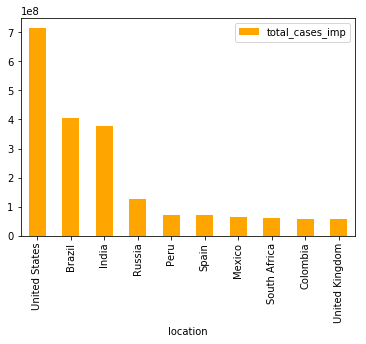

In [366]:
print('Top 10 countries with the Heighest number of Corona  Cases: ')
db=pd.DataFrame(new_df.groupby(['location']).agg({"total_cases_imp":'sum'}))
db.sort_values(by="total_cases_imp", ascending=False).head(10).plot(kind='bar',color=['orange','red','blue'])
      

Top 10 countries with the Heighest number of Corona Death Cases: 


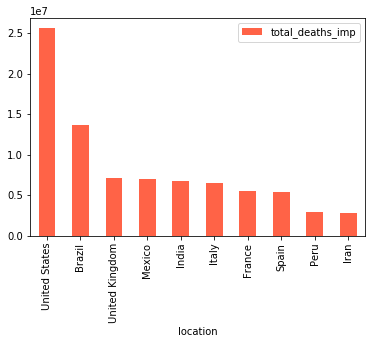

In [367]:
print('Top 10 countries with the Heighest number of Corona Death Cases: ')
ds=pd.DataFrame(new_df.groupby(['location']).agg({"total_deaths_imp":'sum'}))
ds.sort_values(by="total_deaths_imp", ascending=False).head(10).plot(kind='bar',color=['tomato'])

### Domain Specific Analysis - Nepali Corona Cases

In [368]:
## Extracting the data corresponsonding to Nepali corona cases
df_nep=new_df[new_df.location =='Nepal']
## Now we wont be needing the country specific details as we have already extracted all the nepali corona cases data.
## Removing the unwanted columns
df_nep=drop_columns(df_nep,'iso_code')
df_nep=drop_columns(df_nep,'continent')
df_nep=drop_columns(df_nep,'location')

df_nep.tail()

,new_cases_imp,total_deaths_imp,new_deaths_smoothed_imp,new_tests_smoothed_imp,new_cases_smoothed_imp,total_tests_imp,total_cases_imp
date,,,,,,,
2020-10-11,5008.0,614.0,12.286,14648.0,3016.286,1176984.0,105684.0
2020-10-12,2071.0,636.0,14.429,14755.0,2990.286,1191514.0,107755.0
2020-10-13,4047.0,645.0,13.000,15402.0,3219.857,1207091.0,111802.0
2020-10-14,3556.0,663.0,14.286,15402.0,3506.286,1207091.0,115358.0
2020-10-15,2638.0,675.0,13.857,15402.0,3391.857,1207091.0,117996.0


Text(0,0.5,'Number of Cases')

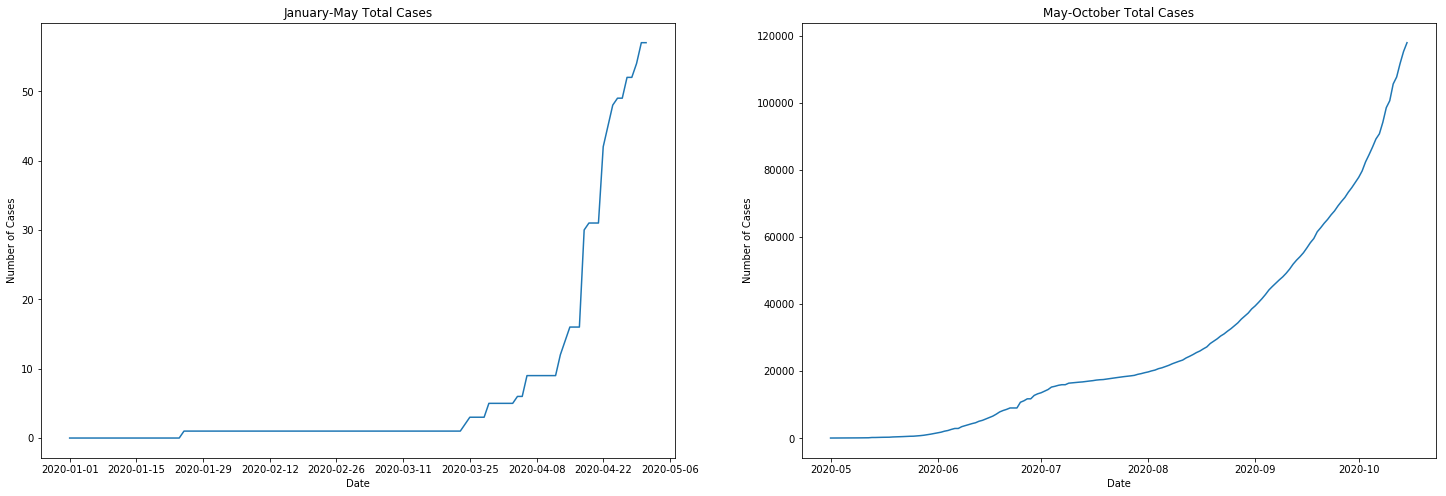

In [369]:
## Analysing the data pattern within the range of 5 months
date_1=df_nep.loc['2020-01-01':'2020-05-01']['total_cases_imp']
date_2=df_nep.loc['2020-05-01':'2020-11-01']['total_cases_imp']

fig=plt.figure(figsize=(25,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(date_1)
ax2.plot(date_2)

ax1.set_title('January-May Total Cases')
ax2.set_title('May-October Total Cases')

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cases')

ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Cases')

Text(0,0.5,'Number of dead')

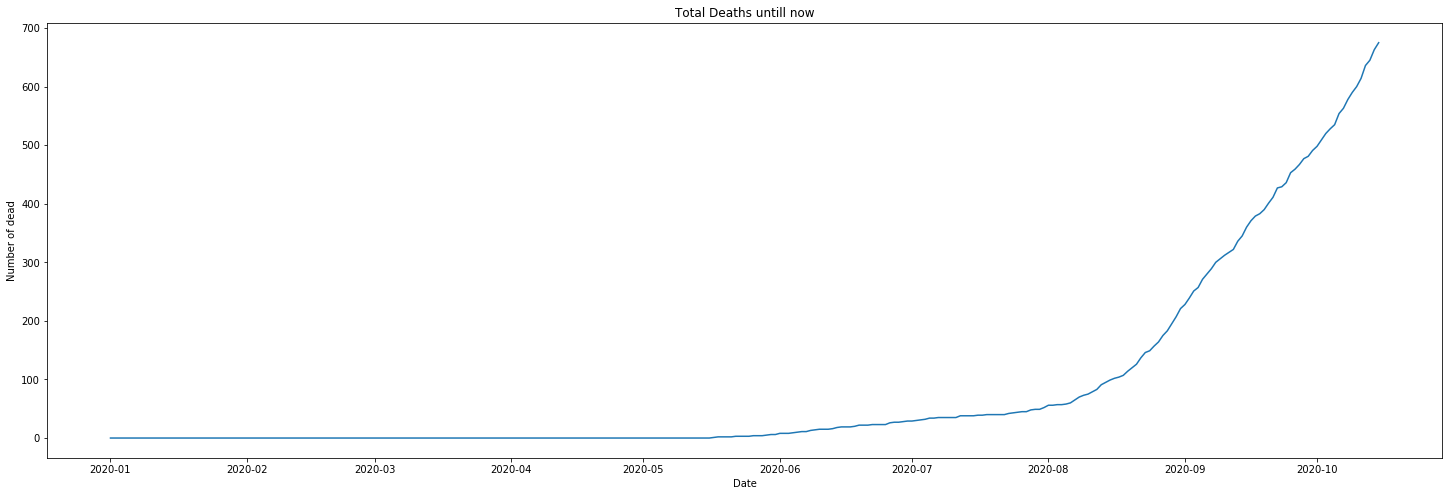

In [370]:
date_1=df_nep.loc['2020-01-01':'2020-11-01']['total_deaths_imp']

fig=plt.figure(figsize=(25,8))
ax1=fig.add_subplot(111)

ax1.plot(date_1)

ax1.set_title('Total Deaths untill now')

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of dead')

### Time Series with upward trend Hypothesis

Here we can observe that the corona cases in Nepal gradually started to increase in the month of April and exponentially got incremented at the end of April and is still increasing. From the graph we can also conclude that it is a time series use case with upward trend.

Now we know that the data is in upward trend with the mean at each progression having different values. While using a time series problem use case we need to keep in mind that the data should be stationary but as it follows a upward trend with 
varying mean it is not at stationary and to support my hypothesis we can perform the following tests

In [371]:
# ## Determing rolling statistics
rolmean= df_nep['total_cases_imp'].rolling(window=12).mean()

rolstd=df_nep['total_cases_imp'].rolling(window=12).std()


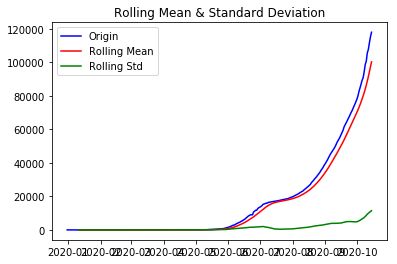

In [372]:
# ## Plot rolling statistics

origin=plt.plot(df_nep['total_cases_imp'],color='blue',label='Origin')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

    * The blue line is the original data distribution over time.
    * The red line is the distribution of mean data points.
    * The green line is the standard deviation distribution of the data points.
Here none of the line are constant hence proving the Time series hypothesis.
Now we need to make it stationary which means that:
    * It should have constant mean
    * It should have constant variance
    * It should follow Auto-Covariance

In [373]:
## ACF and PACF plots:
df_nep_logScale = np.log(df_nep["total_cases_imp"]+1)
datasetLogDiffShifting= df_nep_logScale - df_nep_logScale.shift()


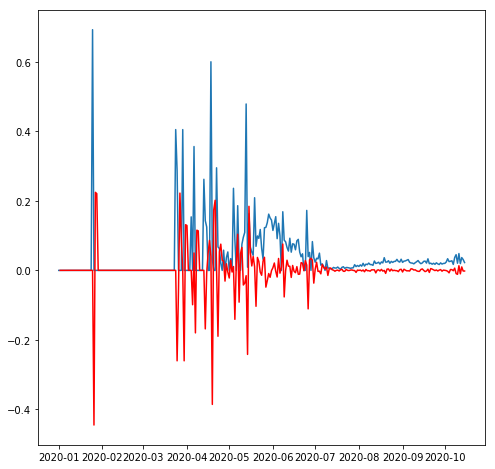

In [374]:
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
model=ARIMA(df_nep_logScale, order=(2,2,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')




The above graph demonstrates the RMSE of the ARIMA model. Given the dataset for Nepal was relatively small the accuracy yeild by the model can be considered and from further Cross Validation techniques we can surely increase the accuracy of the model.

In [375]:
prediction_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
## Convert to cumulative sum
prediction_ARIMA_diff_cumsum=prediction_ARIMA_diff.cumsum()

prediction_ARIMA_log = pd.Series(df_nep_logScale.iloc[0],index=df_nep_logScale.index)
prediction_ARIMA_log =prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

date
2019-12-31    0.000000
2020-01-01    0.000000
2020-01-02    0.000097
2020-01-03    0.000241
2020-01-04    0.000431
dtype: float64

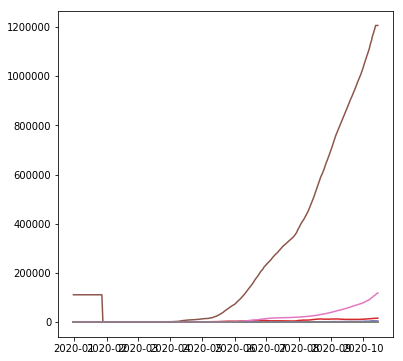

In [376]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df_nep)
plt.plot(prediction_ARIMA)

Here we can observe that the shape of the trend has been successfully captured by the ARIMA model.
Only the magnitude of the mean and standard deviation is same with the original line other than that the trend has been captured and it is safe to say that the time series data is in stationary status which means that we can now perform our prediction.

In [377]:
df_nep_logScale=pd.DataFrame(df_nep_logScale)


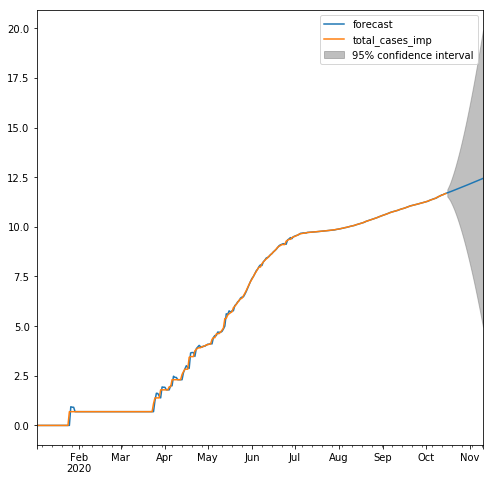

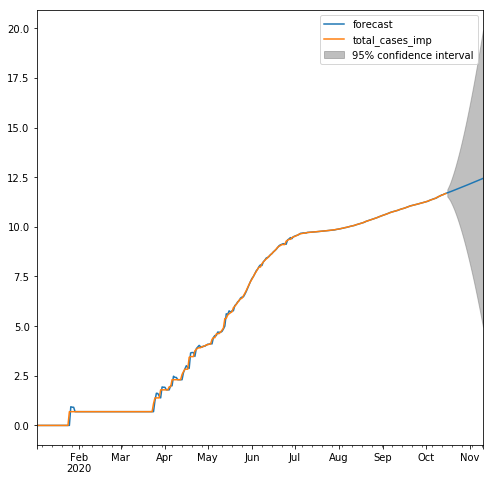

In [378]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

## Now let's try to predict the trend of the total_cases after 1 year.
## Calculation 290(total humber of records)+12(for year)*1(for one year)=290+12*1
## And some additional number for additional months.
results_AR.plot_predict(2,315)


Here we can observe that the trend doesn't seem to fall down in the next following year.
But the confidence interval is widely spread out which implies that the future event can be really unpredictable.
Yet it is safe to assume that at this rate without proper isolation and availability of vaccine the COVID virus will still haunt us in the next following year as well

### Conclusion

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthy Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection.

Countries like USA, Spain, United Kingdom,and Italy are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.
